<a href="https://colab.research.google.com/github/smbillah/ist526/blob/main/Linear_model_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Libraries

In [1]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Load Data from GitHub

In [2]:
# ref: https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

# iris data
url = 'https://raw.githubusercontent.com/smbillah/ist526/main/iris.csv'

#  sample data 
# url = 'https://raw.githubusercontent.com/smbillah/ist526/main/pca_demo.csv'

# pandas call to read csv file 
df = pd.read_csv(url)

# quickly show the dataframe
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# it's a good idea to peek at the tail too. 
# Note, we need display(.) function if more than output is printed
display(df.head())
display(df.tail())

# get column names
display(df.columns)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

# Use Seaborn Library
http://seaborn.pydata.org/examples/index.html

In [4]:
# we already imported seaborn library in the first cell. Doing it again to emphasis.
import seaborn as sns

## Line plot

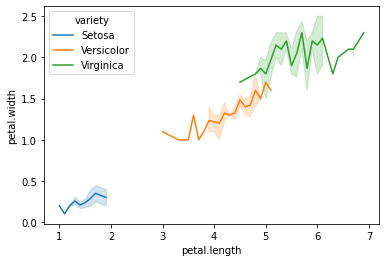

In [ ]:
# Plot the responses for different events and regions
sns.lineplot(data = df, x="petal.length", y="petal.width", hue="variety")

# if there is no label in df, remove 'hue' parameter
# sns.lineplot(data = df, x='x', y='y')
plt.show()

## Regression line with error margin

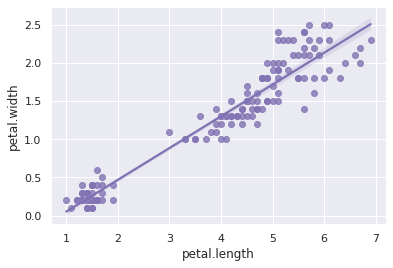

In [ ]:
# Plot the responses for different events and regions
sns.regplot(data = df, x="petal.length", y="petal.width", color='m')
plt.show()

# Linear Regression

In [15]:
x = df["petal.length"]
display(x.shape)
display(x)

(150,)

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal.length, Length: 150, dtype: float64

In [17]:
# need to format x to make rows and columns
x = df["petal.length"].values.reshape(-1,1)
x.shape

(150, 1)

In [18]:
# need to format x to make rows and columns
y = df["petal.width"].values.reshape(-1,1)
y.shape

(150, 1)

In [23]:
from sklearn.linear_model import LinearRegression

# model = LinearRegression().fit(x, y)
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [27]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: [-0.36307552]
slope: [[0.41575542]]


# Stats model

In [31]:
import statsmodels.api as sm
from scipy import stats

# add data (weird style)
x_ = sm.add_constant(x)

# fit an ordinary least square (a.k.a. linear model)
est = sm.OLS(y, x_).fit()

# print coefficient and p-values
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           4.68e-86
Time:                        08:25:51   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3631      0.040     -9.131      0.0

# Housing data
dataset description: https://www.kaggle.com/datasets/aariyan101/usa-housingcsv?resource=download

In [33]:
#  sample data 
url = 'https://raw.githubusercontent.com/smbillah/ist526/main/USA_Housing.csv'

# pandas call to read csv file 
df = pd.read_csv(url)

# quickly show the dataframe
display(df.columns)
df.head()

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [43]:
# create y
y = df['Price'].values.reshape(-1,1)
y.shape

(5000, 1)

In [42]:
# cleaning and filtering dataframe
df_ = df.drop(['Address','Price'],axis=1)
df_.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [41]:
# create numpy X
X = df_.values
X.shape

(5000, 5)

In [44]:
import statsmodels.api as sm
from scipy import stats

# add data (weird style)
X_ = sm.add_constant(X)

# fit an ordinary least square (a.k.a. linear model)
est = sm.OLS(y, X_).fit()

# print coefficient and p-values
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:42:10   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.637e+06   1.72e+04   -153.708      0.0

Explain the above model below:
